# Digits Demo for Multi-Class 

This document is a simplification of Geron's Chapter 3 notebook accompanying the Hands on Machine Learning book.  It has been simplified for teaching purposes focusing on multi-class classification.

In Geron's book, the MNIST data set was used. This version of the notebook uses the scikit-learn built in digits dataset.

https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb


# Setup

In [1]:
import numpy as np
import os
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets

# Digits Data Set

In [2]:
digits = datasets.load_digits()
print(digits.data)
print(digits.target)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [3]:
digits.data.shape

(1797, 64)

In [4]:
X, y = digits.data, digits.target
X.shape

(1797, 64)

In [5]:
y.shape

(1797,)

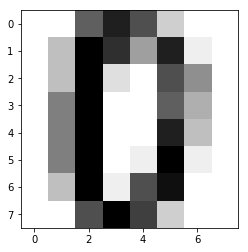

In [6]:
some_digit = X[30]
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

# Multiclass classification

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([0])

In [9]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[  4344.69011203, -22701.66971868, -10333.35588971,
        -15817.78223833,  -2850.43420637,  -5782.41359943,
         -9733.51527854, -11726.97702449,  -5852.47602654,
         -7264.32103875]])

In [10]:
np.argmax(some_digit_scores)

0

In [11]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
sgd_clf.classes_[5]

5

In [13]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([0])

In [14]:
len(ovo_clf.estimators_)

45

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.90322581, 0.95522388, 0.90201005])

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X, y, cv=3)
conf_mx = confusion_matrix(y, y_train_pred)
conf_mx

array([[174,   0,   1,   0,   1,   1,   1,   0,   0,   0],
       [  0, 131,   7,   4,   7,   2,   2,   1,  17,  11],
       [  0,   0, 176,   0,   0,   0,   0,   1,   0,   0],
       [  0,   1,   7, 166,   0,   3,   1,   3,   2,   0],
       [  1,   2,   0,   0, 173,   0,   1,   2,   0,   2],
       [  0,   0,   1,   0,   2, 171,   1,   0,   2,   5],
       [  1,   1,   0,   0,   2,   1, 176,   0,   0,   0],
       [  0,   0,   0,   1,   1,   3,   0, 169,   0,   5],
       [  1,  14,   6,  11,   1,   4,   3,   1, 127,   6],
       [  0,   5,   1,   1,   0,   4,   0,   4,   5, 160]], dtype=int64)

In [29]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix, cmap=plt.cm.gray)
    fig.colorbar(cax)

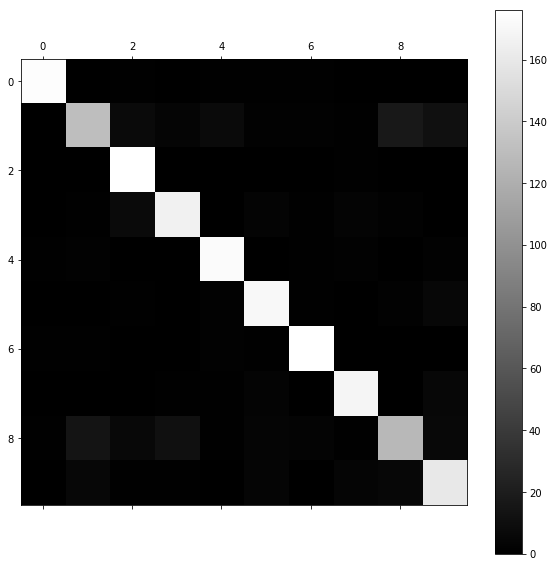

In [30]:
plot_confusion_matrix(conf_mx)
plt.show()

In [19]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

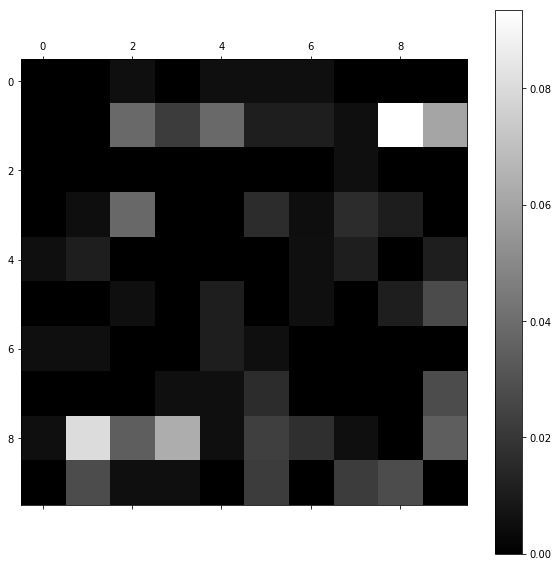

In [31]:
np.fill_diagonal(norm_conf_mx, 0)
plot_confusion_matrix(norm_conf_mx)
plt.show()

# Multilabel classification

In [21]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

6


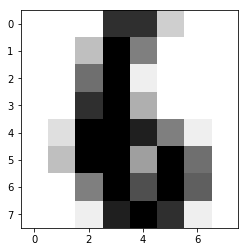

array([[False, False]])

In [22]:
some_digit = X_test[33]
print(y_test[33])
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.show()

knn_clf.predict(some_digit.reshape(1,-1))

**Warning**: the following cell may take a very long time (possibly hours depending on your hardware).

In [23]:
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9786406554487594